In [1]:
import json
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

    
RAW_FOLDER = "raw"
PROCESSED_FOLDER = "processed"

    
def write_dict_into_json(dictionary, filename):
    with open(filename, "w") as write_file:
        json.dump(dictionary, write_file, indent=4)
        
        


In [2]:
reviews = pd.read_parquet("../../data/processed/reviews_with_interactions.parquet")
listings = pd.read_parquet("../../data/processed/listings_with_interactions.parquet")


## Reviews

In [3]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1442687 entries, 0 to 1442686
Columns: 405 entries, listing_id to comment_embedding_383
dtypes: bool(2), datetime64[ns, UTC](1), float64(384), int64(2), object(16)
memory usage: 4.3+ GB


5    1260537
4     148599
3      25143
2       5027
1       3381
Name: rating, dtype: int64

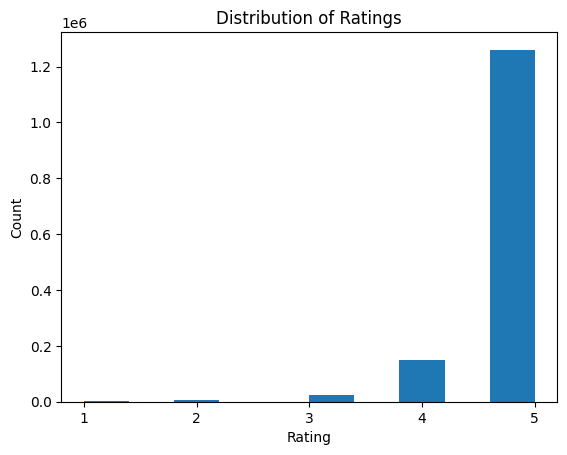

In [12]:
display(reviews['rating'].value_counts())
ax = reviews['rating'].plot.hist()


# set the title and labels
ax.set_title('Distribution of Ratings')
ax.set_xlabel('Rating')
ax.set_ylabel('Count')

# set the x-axis tick labels
ax.set_xticks(range(1, 6))
ax.set_xticklabels(range(1, 6))

# display the plot
plt.show()

/var/folders/mr/dg98_zmd5d90zd_4275kp9r00000gn/T/ipykernel_2063/1611203103.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  reviews['year'] = reviews['created_at'].dt.to_period('Y')


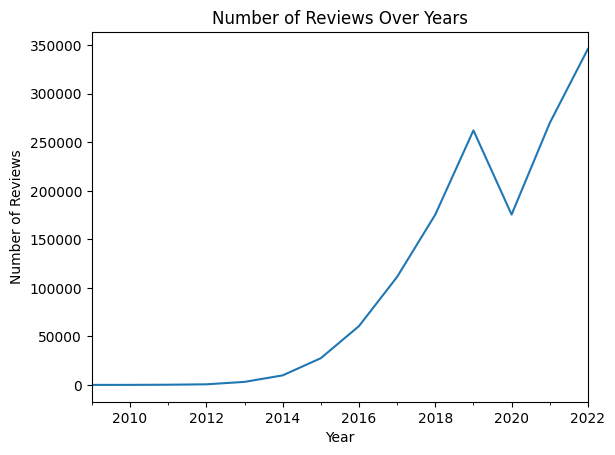

In [24]:
reviews['year'] = reviews['created_at'].dt.to_period('Y')
ax = reviews.groupby('year')['id'].count().plot()

# set the title and labels
ax.set_title('Number of Reviews Over Years')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Reviews')

# display the plot
plt.show()

In [14]:
reviews['created_at'].describe()

/var/folders/mr/dg98_zmd5d90zd_4275kp9r00000gn/T/ipykernel_2063/1694419109.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  reviews['created_at'].describe()


count                       1442687
unique                      1429548
top       2021-09-15 12:02:31+00:00
freq                              4
first     2009-05-23 16:27:17+00:00
last      2022-10-23 13:01:08+00:00
Name: created_at, dtype: object

In [15]:
reviews['created_at'].max()

Timestamp('2022-10-23 13:01:08+0000', tz='UTC')

In [16]:
len(reviews[reviews['created_at'] >= '2009-05-23'])

1442687

In [17]:
reviews['listing_id'].nunique()

20799

In [18]:
review_count_by_listing = reviews.groupby('listing_id')['id'].count()
# Convert the result into a pandas DataFrame
df_review_count_by_listing = review_count_by_listing.reset_index()

# Rename the columns of the DataFrame to 'listing_id' and 'review_count'
df_review_count_by_listing.columns = ['listing_id', 'review_count']

In [19]:
review_count_by_listing.describe()

count    20799.000000
mean        69.363287
std        104.718004
min          1.000000
25%          7.000000
50%         28.000000
75%         89.000000
max       1871.000000
Name: id, dtype: float64

(array([1.1705e+04, 3.1210e+03, 1.8660e+03, 1.2100e+03, 8.0800e+02,
        5.4500e+02, 4.2100e+02, 2.9900e+02, 1.9800e+02, 1.6600e+02,
        1.0200e+02, 6.6000e+01, 6.7000e+01, 5.7000e+01, 3.8000e+01,
        2.8000e+01, 2.0000e+01, 1.0000e+01, 1.8000e+01, 1.6000e+01,
        5.0000e+00, 6.0000e+00, 7.0000e+00, 6.0000e+00, 2.0000e+00,
        1.0000e+00, 0.0000e+00, 3.0000e+00, 1.0000e+00, 1.0000e+00,
        3.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.0000e+00, 3.8400e+01, 7.5800e+01, 1.1320e+02, 1.5060e+02,
        1.8800e+02, 2.2540e+02, 2.6280e+02, 3.0020e+02, 3.3760e+02,
        3.7500e+02, 4.1240e+02, 4.4980e+02, 4.8720e+02, 5.2460e+02,
        5.6200e+02, 5.9940e+02, 6.3680e+02, 6.7420e+02, 7.1160e+02,
        7.4900e+02, 7.8640e+02, 8.2380e+02, 8.

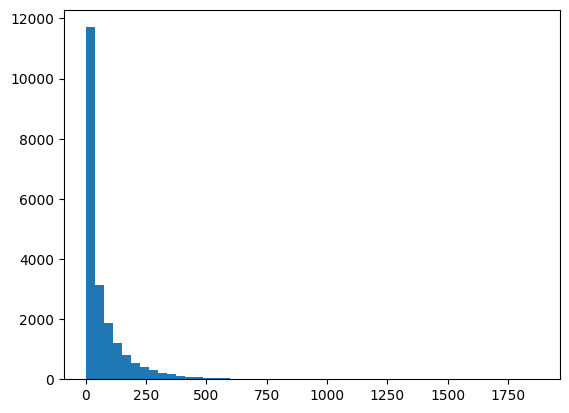

In [20]:
plt.hist(review_count_by_listing, bins=50)

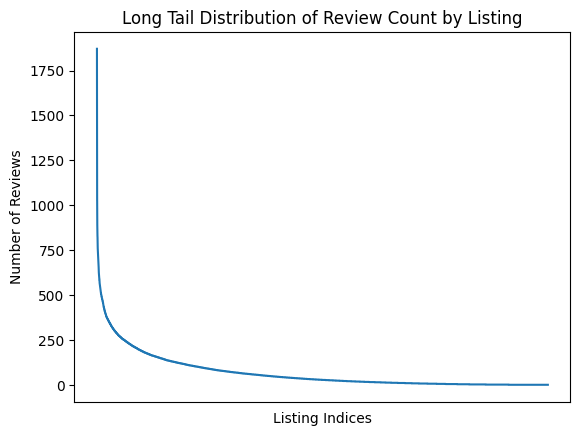

In [25]:
review_count_by_listing_sorted = review_count_by_listing.sort_values(ascending=False)

plt.plot(review_count_by_listing_sorted.index, review_count_by_listing_sorted)
plt.xlabel("Listing Indices")
plt.ylabel("Number of Reviews")
plt.title("Long Tail Distribution of Review Count by Listing")

# Hide the x-axis label
plt.xticks([])

plt.show()

# Listing

In [6]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20799 entries, 0 to 24286
Columns: 162 entries, num_of_guest_capacity to listing_id
dtypes: bool(124), category(8), datetime64[ns](1), float64(27), object(2)
memory usage: 7.6+ MB


In [30]:
for col in listings.columns:
    display(listings[col].value_counts())


2.0     7237
4.0     4010
6.0     2181
3.0     1692
8.0     1166
5.0     1031
1.0      694
10.0     663
16.0     626
12.0     413
7.0      406
9.0      263
14.0     165
15.0     105
11.0      76
13.0      71
Name: num_of_guest_capacity, dtype: int64

1.0     10993
2.0      3695
3.0      2320
0.0      1355
4.0      1160
5.0       540
6.0       295
7.0       160
8.0        94
10.0       58
9.0        47
11.0       20
12.0       19
13.0       12
20.0        7
16.0        5
15.0        4
19.0        2
17.0        2
30.0        2
18.0        2
21.0        2
50.0        1
25.0        1
26.0        1
14.0        1
24.0        1
Name: num_of_bedroom, dtype: int64

0.0    20761
1.0       35
2.0        2
3.0        1
Name: num_of_private_bedroom, dtype: int64

1.0     7970
2.0     4474
3.0     2676
4.0     1886
5.0     1005
6.0      752
7.0      394
0.0      381
8.0      376
10.0     178
9.0      171
11.0     105
12.0      89
16.0      65
15.0      56
14.0      46
13.0      42
20.0      20
18.0      16
21.0      13
17.0      11
24.0       8
23.0       7
19.0       7
22.0       5
29.0       5
40.0       5
25.0       4
27.0       4
28.0       4
26.0       3
31.0       3
50.0       2
56.0       2
37.0       2
35.0       2
39.0       1
47.0       1
69.0       1
30.0       1
45.0       1
59.0       1
43.0       1
38.0       1
51.0       1
32.0       1
Name: num_of_bed, dtype: int64

0.0    20799
Name: num_of_room, dtype: int64

0.0    17687
1.0     3094
0.5       18
Name: num_of_private_bath, dtype: int64

0.0     18607
1.0      1286
1.5       297
2.0       260
3.0        97
0.5        67
2.5        53
4.0        33
3.5        26
5.0        21
6.0        13
16.0        6
10.0        5
4.5         5
7.0         3
6.5         3
9.0         3
5.5         3
8.0         2
12.0        2
11.5        2
16.5        1
26.0        1
15.0        1
8.5         1
11.0        1
Name: num_of_shared_bath, dtype: int64

0.0    19926
1.0      873
Name: num_of_studio, dtype: int64

1.0     7811
0.0     5525
2.0     2517
1.5     1588
3.0      911
2.5      467
4.0      432
3.5      282
5.0      243
4.5      218
0.5      167
6.0      129
5.5      103
7.0       82
8.0       70
6.5       69
7.5       40
9.0       26
10.0      22
8.5       18
11.0      12
9.5       12
12.0      11
10.5      10
15.0       5
13.0       5
14.0       4
12.5       3
14.5       3
11.5       2
13.5       2
16.0       2
30.0       2
22.0       1
19.0       1
24.0       1
20.0       1
18.0       1
21.5       1
Name: num_of_bath, dtype: int64

False    13289
True      7510
Name: house_rule_is_self_checkIn, dtype: int64

NO         13392
YES         3860
UNKNOWN     3547
Name: house_rule_is_smoking_allowed, dtype: int64

NO         12355
YES         5211
UNKNOWN     3233
Name: house_rule_is_pet_allowed, dtype: int64

False    16026
True      4773
Name: house_rule_no_child_allowed, dtype: int64

True     13288
False     7511
Name: house_rule_no_party_allowed, dtype: int64

False    20780
True        19
Name: house_rule_has_quiet_hours, dtype: int64

UNKNOWN    20773
NO            14
YES           12
Name: house_rule_is_commercial_photography_allowed, dtype: int64

False    13679
True      7120
Name: listing_expectation_must_climb_stair, dtype: int64

False    17004
True      3795
Name: listing_expectation_has_shared_space, dtype: int64

False    17424
True      3375
Name: listing_expectation_has_pet_live_on_property, dtype: int64

False    18905
True      1894
Name: listing_expectation_has_potential_for_noise, dtype: int64

False    19079
True      1720
Name: listing_expectation_has_amenity_limitations, dtype: int64

False    18413
True      2386
Name: listing_expectation_no_parking_on_property, dtype: int64

False    20706
True        93
Name: listing_expectation_has_weapons_on_property, dtype: int64

UNKNOWN         8722
YES             6034
NO              4586
NOT_REQUIRED    1457
Name: safety_expectation_has_carbon_monoxide_alarm, dtype: int64

YES        10310
UNKNOWN     6617
NO          3872
Name: safety_expectation_has_smoke_alarm, dtype: int64

False    17616
True      3183
Name: safety_expectation_has_security_camera, dtype: int64

False    20261
True       538
Name: safety_expectation_may_encounter_potentially_dangerous_animal, dtype: int64

False    18011
True      2788
Name: safety_expectation_is_nearby_body_of_water, dtype: int64

False    19878
True       921
Name: safety_expectation_has_climbing_or_play_structure, dtype: int64

False    19773
True      1026
Name: safety_expectation_heights_without_protection, dtype: int64

False    18921
True      1878
Name: safety_expectation_pool_or_hottub_without_a_gate_or_lock, dtype: int64

False    20303
True       496
Name: safety_expectation_no_child_allowed, dtype: int64

0.0     14552
1.0      4093
2.0      1309
3.0       440
4.0       203
5.0        88
6.0        50
8.0        19
7.0        19
9.0         8
10.0        7
11.0        3
14.0        3
13.0        2
30.0        1
21.0        1
28.0        1
Name: sleeping_arrangement_num_of_queen_bed, dtype: int64

0.0     15188
2.0      2239
1.0      1746
4.0       587
3.0       400
6.0       156
5.0       133
8.0        96
7.0        66
10.0       48
9.0        33
12.0       16
14.0       13
11.0       10
18.0       10
16.0       10
13.0        7
15.0        7
24.0        6
20.0        5
22.0        3
17.0        3
23.0        3
19.0        2
59.0        1
31.0        1
30.0        1
45.0        1
46.0        1
25.0        1
43.0        1
29.0        1
37.0        1
32.0        1
28.0        1
50.0        1
Name: sleeping_arrangement_num_of_single_bed, dtype: int64

0.0     16839
1.0      2563
2.0       700
3.0       345
4.0       167
5.0        83
6.0        48
7.0        25
8.0         9
9.0         8
10.0        6
12.0        3
13.0        1
11.0        1
15.0        1
Name: sleeping_arrangement_num_of_king_bed, dtype: int64

0.0     17815
1.0      2465
2.0       394
3.0        52
4.0        41
6.0        10
5.0         9
7.0         6
8.0         5
10.0        2
Name: sleeping_arrangement_num_of_sofa_bed, dtype: int64

0.0     13779
1.0      4619
2.0      1394
3.0       480
4.0       254
5.0       108
6.0        73
7.0        25
8.0        22
10.0       12
9.0         8
12.0        7
11.0        6
16.0        4
14.0        2
15.0        1
17.0        1
18.0        1
38.0        1
13.0        1
28.0        1
Name: sleeping_arrangement_num_of_double_bed, dtype: int64

0.0    19913
1.0      722
2.0      121
3.0       16
4.0       15
5.0        6
6.0        5
7.0        1
Name: sleeping_arrangement_num_of_couch, dtype: int64

0.0     18892
1.0       749
2.0       508
3.0       168
4.0       155
5.0        84
6.0        60
8.0        46
7.0        32
10.0       29
9.0        21
12.0       16
13.0        6
15.0        5
14.0        5
11.0        4
24.0        4
16.0        4
17.0        3
20.0        2
25.0        2
35.0        1
22.0        1
18.0        1
21.0        1
Name: sleeping_arrangement_num_of_mattress, dtype: int64

0.0    20304
1.0      416
2.0       67
3.0        8
7.0        1
4.0        1
6.0        1
8.0        1
Name: sleeping_arrangement_num_of_crib, dtype: int64

0.0     19965
1.0       523
2.0       209
3.0        48
4.0        26
5.0         9
6.0         7
8.0         7
27.0        1
9.0         1
14.0        1
15.0        1
10.0        1
Name: sleeping_arrangement_num_of_bunk_bed, dtype: int64

0.0    20611
1.0      159
2.0       18
3.0       10
8.0        1
Name: sleeping_arrangement_num_of_toddler_bed, dtype: int64

0.0    20637
1.0      118
2.0       31
3.0        5
5.0        4
4.0        3
7.0        1
Name: sleeping_arrangement_num_of_hammock, dtype: int64

0.0    20781
1.0       17
3.0        1
Name: sleeping_arrangement_num_of_day_bed, dtype: int64

0.0    20797
1.0        1
4.0        1
Name: sleeping_arrangement_num_of_futon_bed, dtype: int64

0.0    20796
1.0        3
Name: sleeping_arrangement_num_of_murphy_bed, dtype: int64

0.0    20796
1.0        3
Name: sleeping_arrangement_num_of_water_bed, dtype: int64

30.0      226
35.0      207
40.0      191
32.0      190
25.0      188
         ... 
855.0       1
1010.0      1
1735.0      1
2286.0      1
3191.0      1
Name: price_per_night, Length: 1079, dtype: int64

Malaysia       1774
Italy          1447
Thailand       1417
Indonesia      1341
Australia      1331
               ... 
Azerbaijan        0
Botswana          0
Kosovo            0
Timor-Leste       0
Rwanda            0
Name: country, Length: 132, dtype: int64

Entire rental unit             2065
Entire home                    1973
Entire villa                   1747
Private room in home           1117
Private room in rental unit    1091
                               ... 
Shared room in villa              0
Shared room in resort             0
Shared room in nature lodge       0
Shared room in houseboat          0
Shared room in guest suite        0
Name: listing_type, Length: 159, dtype: int64

 42.47060    14
 1.31850     10
 1.31170      7
 1.28240      6
 20.20300     6
             ..
-35.49800     1
 7.79819      1
 46.92510     1
 36.48350     1
 63.16270     1
Name: lat, Length: 20111, dtype: int64

 44.49210     11
 103.84750    10
 103.86030     7
-87.48990      6
 98.97480      6
              ..
 140.33655     1
-1.81008       1
 44.49345      1
 135.78080     1
 10.02980      1
Name: lng, Length: 20159, dtype: int64

True     15793
False     5006
Name: location_disclaimer, dtype: int64

NORMAL    20310
PLUS        489
Name: listing_detail_type, dtype: int64

True     13941
False     6858
Name: amenity_has_SHAMPOO, dtype: int64

True     18544
False     2255
Name: amenity_has_TOILETRIES, dtype: int64

True     16090
False     4709
Name: amenity_has_HANGERS, dtype: int64

False    16665
True      4134
Name: amenity_has_CRIB, dtype: int64

False    18109
True      2690
Name: amenity_has_TOYS, dtype: int64

False    17032
True      3767
Name: amenity_has_HIGH_CHAIR, dtype: int64

True     12986
False     7813
Name: amenity_has_AIR_CONDITIONING, dtype: int64

True     12429
False     8370
Name: amenity_has_FIRE_EXTINGUISHER, dtype: int64

False    17504
True      3295
Name: amenity_has_BEACH, dtype: int64

False    12846
True      7953
Name: amenity_has_LUGGAGE_DROP, dtype: int64

True     17849
False     2950
Name: amenity_has_LONG_TERM_STAYS_ALLOWED, dtype: int64

False    12601
True      8198
Name: amenity_has_SELF_CHECKIN, dtype: int64

False    18517
True      2282
Name: amenity_has_DOORMAN, dtype: int64

False    16655
True      4144
Name: amenity_has_NO_KITCHEN, dtype: int64

False    15412
True      5387
Name: amenity_has_NO_HAIR_DRYER, dtype: int64

False    17620
True      3179
Name: amenity_has_VIEW_MOUNTAIN, dtype: int64

True     15409
False     5390
Name: amenity_has_HAIRDRYER, dtype: int64

False    18807
True      1992
Name: amenity_has_OUTDOOR_SHOWER, dtype: int64

True     10996
False     9803
Name: amenity_has_WASHER, dtype: int64

True     12169
False     8630
Name: amenity_has_IRON, dtype: int64

True     14630
False     6169
Name: amenity_has_TV, dtype: int64

False    20471
True       328
Name: amenity_has_POOL_TABLE, dtype: int64

True     12200
False     8599
Name: amenity_has_HEATER, dtype: int64

False    17347
True      3452
Name: amenity_has_SURVEILLANCE, dtype: int64

False    10426
True     10373
Name: amenity_has_FIRST_AID_KIT, dtype: int64

True     17971
False     2828
Name: amenity_has_WI_FI, dtype: int64

False    13285
True      7514
Name: amenity_has_WORKSPACE, dtype: int64

True     16652
False     4147
Name: amenity_has_COOKING_BASICS, dtype: int64

True     15041
False     5758
Name: amenity_has_REFRIGERATOR, dtype: int64

True     11315
False     9484
Name: amenity_has_COFFEE_MAKER, dtype: int64

True     11590
False     9209
Name: amenity_has_PATIO_BALCONY, dtype: int64

False    12990
True      7809
Name: amenity_has_GRILL, dtype: int64

True     18444
False     2355
Name: amenity_has_PARKING_AREA, dtype: int64

False    14528
True      6271
Name: amenity_has_POOL, dtype: int64

False    18167
True      2632
Name: amenity_has_JACUZZI, dtype: int64

True     11435
False     9364
Name: amenity_has_GARDEN, dtype: int64

False    18362
True      2437
Name: amenity_has_RESORT, dtype: int64

False    16470
True      4329
Name: amenity_has_VIEW_OCEAN, dtype: int64

False    14593
True      6206
Name: amenity_has_CLEANING_SUPPLIES, dtype: int64

False    12220
True      8579
Name: amenity_has_SOAP, dtype: int64

True     16102
False     4697
Name: amenity_has_HOT_WATER, dtype: int64

False    15348
True      5451
Name: amenity_has_DRYER, dtype: int64

True     13129
False     7670
Name: amenity_has_BLANKETS, dtype: int64

False    12219
True      8580
Name: amenity_has_PILLOW, dtype: int64

False    15288
True      5511
Name: amenity_has_BLACKOUT_SHADES, dtype: int64

False    19241
True      1558
Name: amenity_has_MOSQUITO_NET, dtype: int64

False    14516
True      6283
Name: amenity_has_WARDROBE, dtype: int64

False    18964
True      1835
Name: amenity_has_SPEAKERS, dtype: int64

False    17528
True      3271
Name: amenity_has_BOOK, dtype: int64

False    18089
True      2710
Name: amenity_has_FAN_PORTABLE, dtype: int64

False    10690
True     10109
Name: amenity_has_MICROWAVE, dtype: int64

True     14874
False     5925
Name: amenity_has_DISHES_AND_SILVERWARE, dtype: int64

False    18097
True      2702
Name: amenity_has_MINI_FRIDGE, dtype: int64

True     10910
False     9889
Name: amenity_has_STOVE, dtype: int64

False    13363
True      7436
Name: amenity_has_OVEN, dtype: int64

False    13971
True      6828
Name: amenity_has_WATER_KETTLE, dtype: int64

False    16151
True      4648
Name: amenity_has_TOASTER, dtype: int64

False    19178
True      1621
Name: amenity_has_RICE_COOKER, dtype: int64

True     10780
False    10019
Name: amenity_has_PRIVATE_ENTRANCE, dtype: int64

False    18128
True      2671
Name: amenity_has_LAUNDRY_SERVICE, dtype: int64

False    20418
True       381
Name: amenity_has_KAYAK, dtype: int64

False    20218
True       581
Name: amenity_has_SAUNA, dtype: int64

False    15206
True      5593
Name: amenity_has_PETS, dtype: int64

False    16703
True      4096
Name: amenity_has_SMOKING_ALLOWED, dtype: int64

False    15870
True      4929
Name: amenity_has_HOST_GREETING, dtype: int64

False    16441
True      4358
Name: amenity_has_FIREPLACE, dtype: int64

False    16017
True      4782
Name: amenity_has_LOCK_ON_DOOR, dtype: int64

False    19637
True      1162
Name: amenity_has_LIVING_ROOM, dtype: int64

False    15319
True      5480
Name: amenity_has_SAFE, dtype: int64

False    16921
True      3878
Name: amenity_has_BATHTUB, dtype: int64

False    18454
True      2345
Name: amenity_has_FAN_CEILING, dtype: int64

False    13942
True      6857
Name: amenity_has_DINING_AREA, dtype: int64

False    18091
True      2708
Name: amenity_has_ELEVATOR, dtype: int64

False    18299
True      2500
Name: amenity_has_GYM, dtype: int64

False    18165
True      2634
Name: amenity_has_FIREPIT, dtype: int64

False    18570
True      2229
Name: amenity_has_TOILET_BIDET, dtype: int64

False    20030
True       769
Name: amenity_has_BIKE, dtype: int64

False    19036
True      1763
Name: amenity_has_CLEAN_BEFORE_CHECKOUT, dtype: int64

False    17366
True      3433
Name: amenity_has_BREAKFAST, dtype: int64

False    18851
True      1948
Name: amenity_has_BOARD_GAMES, dtype: int64

False    18945
True      1854
Name: amenity_has_CHILD_UTENSILS, dtype: int64

False    18558
True      2241
Name: amenity_has_ETHERNET, dtype: int64

False    19969
True       830
Name: amenity_has_WINDOW_GUARD, dtype: int64

False    20271
True       528
Name: amenity_has_BABY_GATE, dtype: int64

False    19080
True      1719
Name: amenity_has_BLENDER, dtype: int64

False    19416
True      1383
Name: amenity_has_HAMMOCK, dtype: int64

False    18004
True      2795
Name: amenity_has_PACK_N_PLAY, dtype: int64

False    16532
True      4267
Name: amenity_has_DISHWASHER, dtype: int64

False    20573
True       226
Name: amenity_has_RECORD_PLAYER, dtype: int64

False    19869
True       930
Name: amenity_has_BABY_BATH, dtype: int64

False    20435
True       364
Name: amenity_has_SKI, dtype: int64

False    20125
True       674
Name: amenity_has_EV_CHARGER, dtype: int64

False    17401
True      3398
Name: amenity_has_NO_STAIRS, dtype: int64

False    20667
True       132
Name: amenity_has_DESERT_VIEW, dtype: int64

False    20622
True       177
Name: amenity_has_CORNER_GUARD, dtype: int64

False    20422
True       377
Name: amenity_has_PING_PONG, dtype: int64

False    19607
True      1192
Name: amenity_has_VIEW_CITY, dtype: int64

False    20219
True       580
Name: amenity_has_FIREPLACE_GUARD, dtype: int64

False    20393
True       406
Name: amenity_has_CHANGING_DIAPER_TABLE, dtype: int64

False    19730
True      1069
Name: amenity_has_PORTABLE_WI_FI, dtype: int64

False    20677
True       122
Name: amenity_has_BABY_MONITOR, dtype: int64

False    20289
True       510
Name: amenity_has_OUTLET_COVER, dtype: int64

False    20538
True       261
Name: amenity_has_TRASH_COMPACTOR, dtype: int64

False    20473
True       326
Name: amenity_has_PIANO, dtype: int64

False    20350
True       449
Name: amenity_has_VIDEO_GAME, dtype: int64

233211645    27
374949559    23
23336011     23
154372336    22
269168618    20
             ..
199860659     1
174836336     1
102545781     1
495813        1
102568609     1
Name: host_user_id, Length: 16827, dtype: int64

2016-05-01    340
2016-01-01    318
2016-06-01    316
2016-08-01    298
2016-03-01    292
             ... 
2008-11-01      1
2022-11-01      1
2008-09-01      1
2009-04-01      1
2009-09-01      1
Name: host_joined_date, Length: 161, dtype: int64

32875634              1
7467514               1
21099880              1
39408391              1
677887152030629001    1
                     ..
642321262107614994    1
582277173285421791    1
2981771               1
18926336              1
37139014              1
Name: listing_id, Length: 20799, dtype: int64

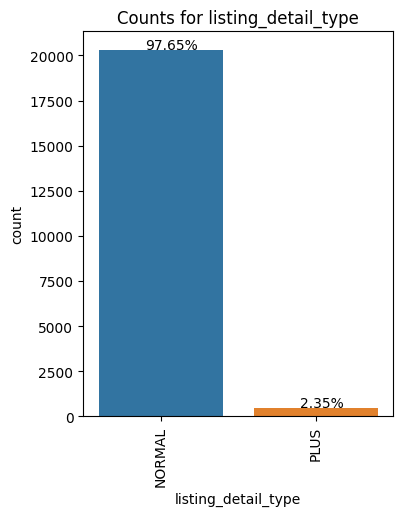

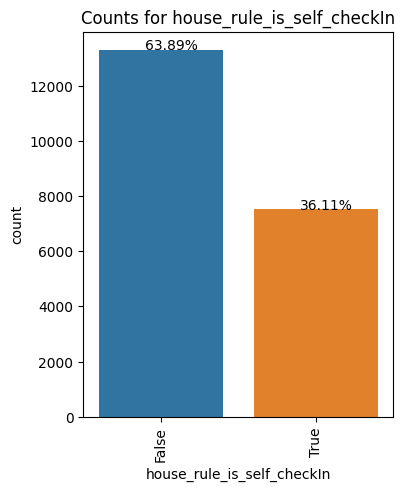

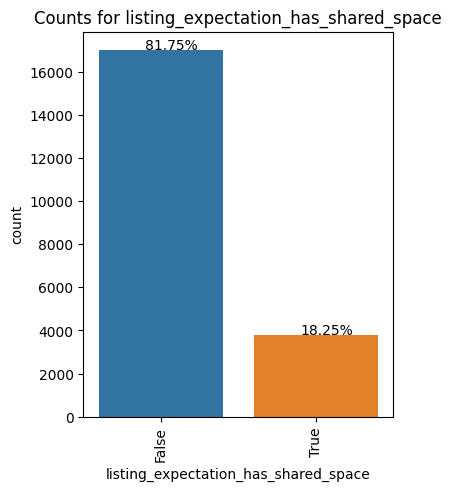

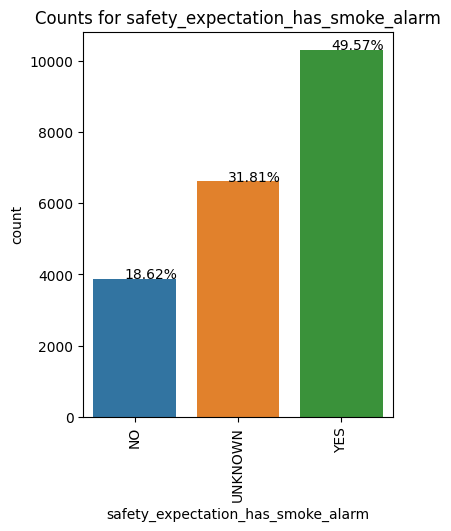

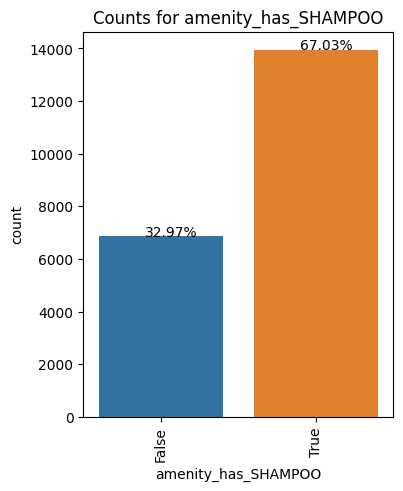

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# helper functions

def customCountPlot(data, ax=None):
    totalCount = len(data)
    ax = sns.countplot(x=data, order=sorted(data.unique()),ax=ax)
    for p in ax.patches: 
        percentage = round((p.get_height() / totalCount) * 100,2)
        ax.annotate(f'{percentage}%',(p.get_x()+0.3, p.get_height()+10))

def plotUnivariateFeature(colName, isContinuous, df, ax=None,bins=None):
    # Ignore rows that has missing data on specific column
    data = df.loc[df[colName].notnull(), colName]
    if isContinuous:
        if bins != None:
            sns.histplot(data, ax=ax,bins=bins)
        else:
            sns.histplot(data, ax=ax)
    else:
        customCountPlot(data,ax)
        
    
categoricalColumns = ['listing_detail_type', 'house_rule_is_self_checkIn', 'listing_expectation_has_shared_space'
                     ,'safety_expectation_has_smoke_alarm','amenity_has_SHAMPOO']

for colName in categoricalColumns:
    fig, (ax) = plt.subplots(1,1,figsize=(4,5))
    ax.set_title(f"Counts for {colName}")
    plt.xticks(rotation=90)
    plotUnivariateFeature(colName,False,listings,ax)
    


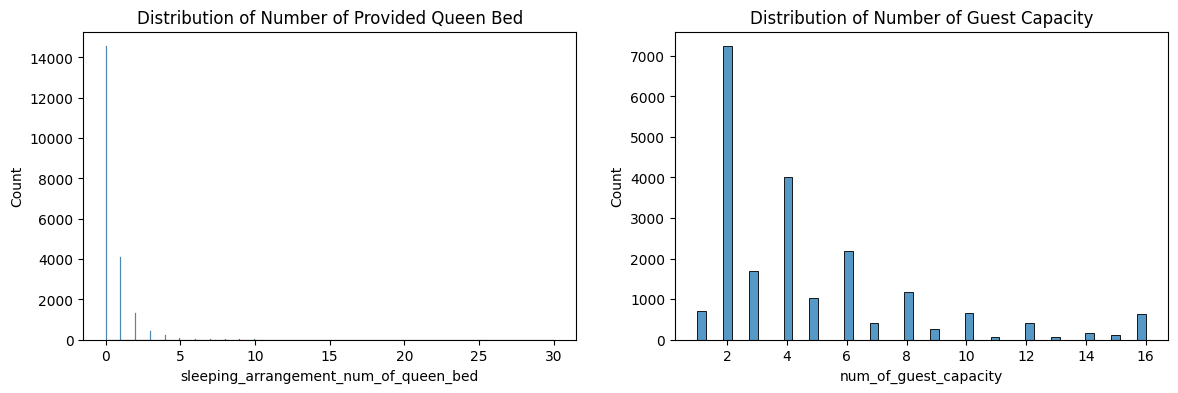

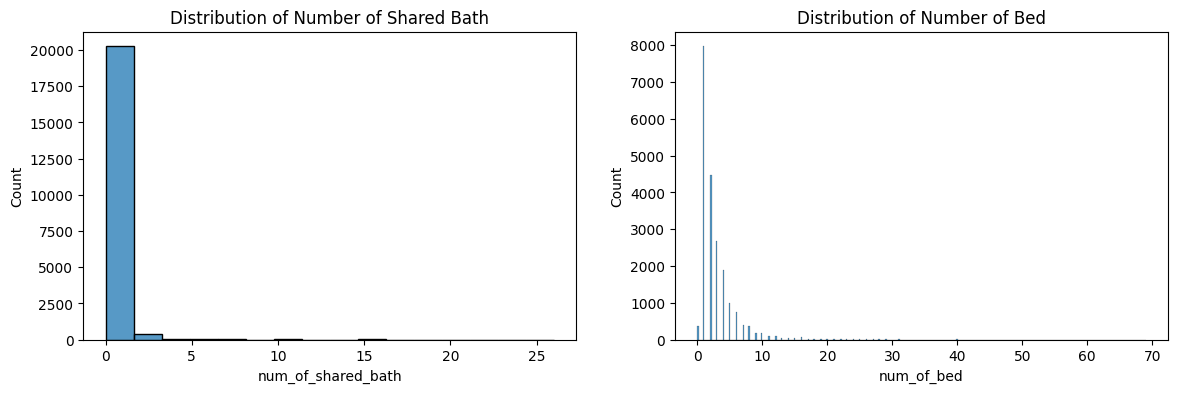

In [29]:
# num_of_room is dropped as it only contain zeros
numeric_cols = ['sleeping_arrangement_num_of_queen_bed', 'num_of_guest_capacity', 'num_of_shared_bath', 'num_of_bed']

fig, ((ax1, ax2)) = plt.subplots(1,2,figsize=(14,4))
fig, ((ax3, ax4)) = plt.subplots(1,2,figsize=(14,4))
# fig, ((ax5, ax6)) = plt.subplots(1,2,figsize=(14,4))
# fig, ax7 = plt.subplots(1,1,figsize=(14,4))


ax1.set_title("Distribution of Number of Provided Queen Bed")
ax2.set_title("Distribution of Number of Guest Capacity")
ax3.set_title("Distribution of Number of Shared Bath")
ax4.set_title("Distribution of Number of Bed")


plotUnivariateFeature(numeric_cols[0],True,listings,ax=ax1)
plotUnivariateFeature(numeric_cols[1],True,listings,ax=ax2)
plotUnivariateFeature(numeric_cols[2],True,listings,ax=ax3)
plotUnivariateFeature(numeric_cols[3],True,listings,ax=ax4)
